In [173]:
import math as ma
import matplotlib.pyplot as plt
import numpy as np

def lerp(x, xmin, xmax, ymin, ymax):
    # Linear interpolation from x to y
    return (x - xmin) * (ymax - ymin) / (xmax - xmin) + ymin;

def sgn(a, b):
    return int(a>b) - int(a<b)

def v_cts(v0, vf, x0, xf, x):
    sign = sgn(xf, x0)   # sign - which direction we are going
    v0 = v0 * sign       # initial and final v with proper direction
    vf = vf * sign
    dv = vf - v0         # delta V
    dx = xf - x0         # delta X
    dxi = x0 - x         # displacement from starting point
    vi = v0 + dv/2.0     # intermeidiate value
    ac = (dv * dx) / vi  # acceleration
    
    # Handle zero acceleration case
    if(ac == 0 and x > x0 and x < xf):
        return v0
    # Handle case where we hit end
    if (sign * x > sign * xf):
        return 0.0
    # If we are behind our initial point, act as though we are at the initial point - correct for small errors
    x = x0 if (sign * x0 > sign * x) else x
    
    # Calculate our estimated time as a function of position
    t_est = abs(vi/(dv*dx) * (-sign*v0 + ma.sqrt(v0**2 - 2*dv*vi*dxi/dx)))
    
    v_out = v0 + ac * t_est
    
       
    return v_out

def pos_list(x0, xf, n):
    xe = (xf-x0)*float(n)/float(n+1) + x0
    pos = [lerp(i, 0, n, x0, xe) for i in range(n)]
    
    return pos

def v_list(v0, vf, x0, xf, n):
    xe = (xf-x0)*float(n)/float(n+1) + x0
    v = [v_cts(v0, vf, x0, xe, x) for x in pos_list(x0, xf, n-1)]
    v.append(vf)
    
    return v

def x_t(vlist, x0, xf, t):
    sign = sgn(xf, x0)
    n = len(vlist)
    dx = (xf-x0)/n
    
    t_list = [dx/v for v in vlist]
    t_list = [0.0] + t_list
    
    idx = -1
    for i in range(n):
        if(t < sum(t_list[0:(i+1)])):
            idx = i-1
            break
    
    x = xf if idx < 0 else min(idx*dx + (t-sum(t_list[0: idx+1]))*vlist[idx], (idx+1)*dx) 
    
    return x

def x_t_ideal(v0, vf, x0, xf, t):
    sign = sgn(xf, x0)
    dv = vf - v0         # delta V
    dx = xf - x0         # delta X
    vi = v0 + dv/2.0     # intermeidiate value
    ac = (dv * dx) / vi  # acceleration
    
    x = x0 + v0*t + ac * t**2 /2
    
    if(sign * x > sign * xf):
        return xf
    else:
        return x

def plot_out(v0, vf, x0, xf, n, m):
    vl = v_list(v0, vf, x0, xf, n)
    
    sign = sgn(xf, x0)   # sign - which direction we are going
    signa = sgn(vf, v0)
    v0 = v0 * sign       # initial and final v with proper direction
    vf = vf * sign
    dv = vf - v0         # delta V
    dx = xf - x0         # delta X
    vi = v0 + dv/2.0     # intermeidiate value
    ac = (dv * dx) / vi  # acceleration
    
    # Calculate end time
    tf = 3 * ((-v0 + ma.sqrt(v0**2 + 2*ac*dx)) / ac)
        
    # Create time axis
    t = np.linspace(0, tf, m)
    
    # Calculate ideal position values
    x_ideal = [x_t_ideal(v0, vf, x0, xf, ti) for ti in t]
    # Caclualte approx. position values
    x_apprx = [x_t(vl, x0, xf, ti) for ti in t]
    
    
    plt.plot(t, x_ideal)
    plt.show() 
    plt.plot(t, x_apprx)
    plt.show() 

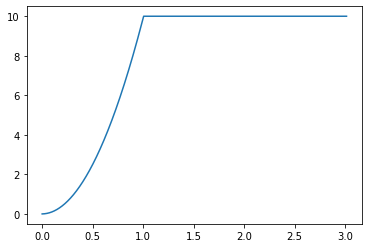

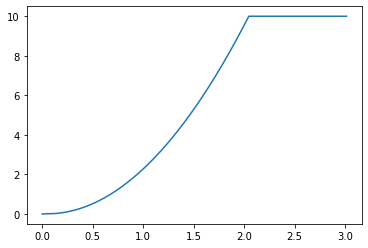

In [176]:
x0 = 0
xf = 10
v0 = 0.1
vf = 10
n = 1024
m = 3*n
plot_out(v0, vf, x0, xf, n, m)